In [1]:
import pandas as pd
import sqlite3

In [2]:
!pip install ipython-sql

You should consider upgrading via the 'C:\Users\Handsome\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
adult_mortality = pd.read_csv('D:/Downloads/archive/Adult mortality.csv', header=1)

maternal_mortality = pd.read_csv('D:/Downloads/archive/Maternal mortality.csv', header=0)

no_deaths = pd.read_csv('D:/Downloads/archive/Number of deaths (thousands).csv', header=1)

prob_deaths = pd.read_csv('D:/Downloads/archive/Probability of dying per 1000 live births.csv', header=1)

data_frames = [adult_mortality, maternal_mortality, no_deaths, prob_deaths]

from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_on=['Country', 'Year'], right_on=['Country','Year'],
                                            how='left'), data_frames).fillna('void')

df_testing = reduce(lambda  left,right: pd.merge(left,right,left_on=['Country', 'Year'], right_on=['Country','Year'],
                                            how='left'), data_frames).fillna('void')

In [4]:
df_merged.columns = ['Country', 'Year', 'Rate_Adult_BothSex', 'Rate_Adult_Male', 'Rate_Adult_Female', 'Ratio_Maternal_per_100000',
                     'Deaths_Maternal', 'Deaths_U5_BothSex_thousands', 'Deaths_U5_Male_thousands', 'Deaths_U5_Female_thousands', 
                     'Deaths_Infant_BothSex_thousands', 'Deaths_Infant_Male_thousands', 'Deaths_Infant_Female_thousands',
                     'Deaths_Neonatal_BothSex_thousands', 'Rate_LiveBirths_BothSex', 'Rate_LiveBirths_Male', 'Rate_LiveBirths_Female',
                     'Rate_Neonatal_BothSex', 'Rate_U5_BothSex', 'Rate_U5_Male', 'Rate_U5_Female']

adult_mortality.columns = ['Country', 'Year', 'Rate_Adult_BothSex', 'Rate_Adult_Male', 'Rate_Adult_Female']
maternal_mortality.columns = ['Country', 'Year', 'Ratio_Maternal_per_100000', 'Deaths_Maternal']
no_deaths.columns = ['Country', 'Year', 'Deaths_U5_BothSex_thousands', 'Deaths_U5_Male_thousands', 'Deaths_U5_Female_thousands', 
                     'Deaths_Infant_BothSex_thousands', 'Deaths_Infant_Male_thousands', 'Deaths_Infant_Female_thousands',
                     'Deaths_Neonatal_BothSex_thousands']
prob_deaths = ['Country', 'Year', 'Rate_LiveBirths_BothSex', 'Rate_LiveBirths_Male', 'Rate_LiveBirths_Female',
                     'Rate_Neonatal_BothSex', 'Rate_U5_BothSex', 'Rate_U5_Male', 'Rate_U5_Female']

In [5]:
conn = sqlite3.connect("D:/Downloads/archive/mortality.db")
c = conn.cursor()

In [6]:
%reload_ext sql
%sql sqlite:///sql_db

In [7]:
%%sql
select * from mastertable

 * sqlite:///sql_db
Done.


Country,Year,Rate_Adult_BothSex,Rate_Adult_Male,Rate_Adult_Female,Ratio_Maternal_per_100000,Deaths_Maternal,Deaths_U5_BothSex_thousands,Deaths_U5_Male_thousands,Deaths_U5_Female_thousands,Deaths_Infant_BothSex_thousands,Deaths_Infant_Male_thousands,Deaths_Infant_Female_thousands,Deaths_Neonatal_BothSex_thousands,Rate_LiveBirths_BothSex,Rate_LiveBirths_Male,Rate_LiveBirths_Female,Rate_Neonatal_BothSex,Rate_U5_BothSex,Rate_U5_Male,Rate_U5_Female


In [8]:
c.execute(
    """
    CREATE TABLE IF NOT EXISTS adult_mortality (        
        Country TEXT,
        Year INTEGER,
        Rate_Adult_BothSex INTEGER,
        Rate_Adult_Male INTEGER,
        Rate_Adult_Female INTEGER,
        Constraint PK_Country_Year Primary Key (Country, Year)
        )
    """
)

c.execute(
    """
    CREATE TABLE IF NOT EXISTS maternal_mortality (        
        Ratio_Maternal_per_100000 INTEGER,
        Deaths_Maternal INTEGER
        
        )
    """
)

c.execute(
    """
    CREATE TABLE IF NOT EXISTS no_deaths (        
        Country TEXT,
        Year INTEGER,
        Deaths_U5_BothSex_thousands INTEGER, 
        Deaths_U5_Male_thousands INTEGER,
        Deaths_U5_Female_thousands INTEGER,
        Deaths_Infant_BothSex_thousands INTEGER,
        Deaths_Infant_Male_thousands INTEGER, 
        Deaths_Infant_Female_thousands INTEGER,
        Deaths_Neonatal_BothSex_thousands INTEGER
        )
    """
)

c.execute(
    """
    CREATE TABLE IF NOT EXISTS prob_deaths (        
        Country TEXT,
        Year INTEGER,
        Rate_LiveBirths_BothSex INTEGER,
        Rate_LiveBirths_Male INTEGER,
        Rate_LiveBirths_Female INTEGER,
        Rate_Neonatal_BothSex INTEGER,
        Rate_U5_BothSex INTEGER,
        Rate_U5_Male INTEGER,
        Rate_U5_Female INTEGER
        )
    """
)

c.execute(
    """
    CREATE TABLE IF NOT EXISTS master_table (
    Country TEXT,
    Year INTEGER,
    Rate_Adult_BothSex INTEGER,
    Rate_Adult_Male INTEGER,
    Rate_Adult_Female INTEGER,
    Ratio_Maternal_per_100000 INTEGER,
    Deaths_Maternal INTEGER,
    Deaths_U5_BothSex_thousands INTEGER,
    Deaths_U5_Male_thousands INTEGER,
    Deaths_U5_Female_thousands INTEGER,
    Deaths_Infant_BothSex_thousands INTEGER,
    Deaths_Infant_Male_thousands INTEGER,
    Deaths_Infant_Female_thousands INTEGER,
    Deaths_Neonatal_BothSex_thousands INTEGER,
    Rate_LiveBirths_BothSex INTEGER,
    Rate_LiveBirths_Male INTEGER,
    Rate_LiveBirths_Female INTEGER,
    Rate_Neonatal_BothSex INTEGER,
    Rate_U5_BothSex INTEGER,
    Rate_U5_Male INTEGER,
    Rate_U5_Female INTEGER,
    Constraint PK_Country_Year Primary Key (Country, Year)
    )
    """
)
conn.commit()

adult_mortality.to_sql('adult_mortality', conn, if_exists = 'append', index=False)
maternal_mortality.to_sql('maternal_mortality', conn, if_exists = 'append', index=False)
no_deaths.to_sql('no_deaths', conn, if_exists = 'append', index=False)
prob_deaths.to_sql('prob_deaths', conn, if_exists = 'append', index=False)

In [9]:
df = pd.read_sql("SELECT * FROM master_table", conn)
print(df)

          Country  Year  Rate_Adult_BothSex  Rate_Adult_Male  \
0     Afghanistan  2016                 245              272   
1     Afghanistan  2015                 233              254   
2     Afghanistan  2014                 234              254   
3     Afghanistan  2013                 235              254   
4     Afghanistan  2012                 242              262   
...           ...   ...                 ...              ...   
3106     Zimbabwe  2004                 694              725   
3107     Zimbabwe  2003                 697              728   
3108     Zimbabwe  2002                 695              728   
3109     Zimbabwe  2001                 688              723   
3110     Zimbabwe  2000                 675              715   

      Rate_Adult_Female Ratio_Maternal_per_100000            Deaths_Maternal  \
0                   216       673 [ 457 - 1 040 ]   8 100 [ 5 500 - 12 000 ]   
1                   210       701 [ 501 - 1 020 ]   8 400 [ 6 000 - 12 

In [10]:
from matplotlib import pyplot as plt
import numpy as np

# Data visualisation 1

## Comparing mortality rates of developed vs developing countries.

As expected,the mortality rate of a developing country (in this case Afghanistan) is higher as compared to
that of a less developed country (Bulgaria). When we look at the mortality rate of a developed country (Germany),
we can see the stark difference. 

This is likely due to the differences in the standards of living between the 3 countries, mainly due to the great varying in standards of healthcare and possibly civil strife.  

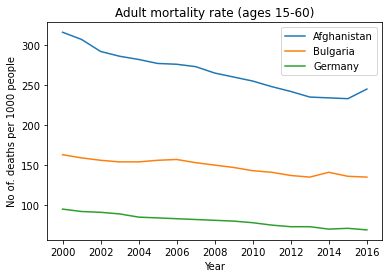

In [11]:
comparison = df.loc[(df['Country'] == 'Afghanistan') | (df['Country'] == 'Germany') | (df['Country'] == 'Bulgaria')]

fig, ax = plt.subplots()
plt.ylabel('No of. deaths per 1000 people')
plt.title('Adult mortality rate (ages 15-60)')
for name, group in comparison.groupby('Country'):
    group.plot(x='Year',y='Rate_Adult_BothSex', ax=ax, label=name)

# Data visualization 2

## Comparing the mortality rate of developing countries

We compare the mortality rates of 3 developing countries, Afghanistan, Ethiopia and Myanmar. Looking at the plot,
we can see that the mortality rate of Ethiopia has decreased by almost half over a 14 year span whereas for Afghanistan
and Myanmar the mortality rate has barely improved. This is possibly due to civil strife in these 2 countries, hindering 
their mortality rates from decreasing more over the years.

We also see a sudden spike for 2008 in the mortality rates for Myanmar, and this was due to the Cyclone Nargis which caused
138,366 fatalities.

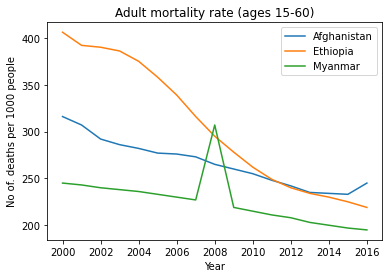

In [12]:
#compare Afghanistan to another developing country, to see if the trend for Afghanistan could be due to ongoing conflicts
developing = df.loc[(df['Country'] == 'Afghanistan') | (df['Country'] == 'Ethiopia') | (df['Country'] == 'Myanmar')]

fig, ax = plt.subplots()
plt.ylabel('No of. deaths per 1000 people')
plt.title('Adult mortality rate (ages 15-60)')
for name, group in developing.groupby('Country'):
    group.plot(x='Year',y='Rate_Adult_BothSex', ax=ax, label=name)

# Data visualisation 3

## Comparing Afghanistan's mortalities rates against a developed country

We aim to see if the mortality rates for Afghanistan are mainly due to civil strife by comparing the Male vs Female mortality
rates. Looking at the plot, we see that the mortality rate for Females is indeed lower than that of Males. However, before
concluding that Males have high mortality rates due to ongoing wars we take a look at the same plot for a developed country.

In this case, we look at Germany. Where we observe the same trends, Males having higher mortality rates than that of Females.
This is possibly due to Males partaking in more hazardous occupations, risk taking in recreational activities and also driving.
Smoking is a possible factor as well, with a higher percentage of smokers being Male can lead to a higher possibility of 
lung cancer and therefore death. 

From this, we are unable to conclude that the higher mortality rate for males in Afghanistan are due to civil strife.

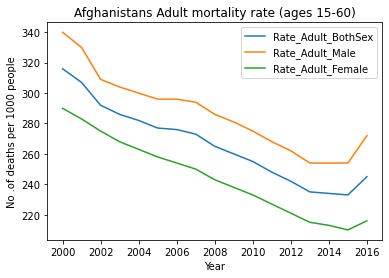

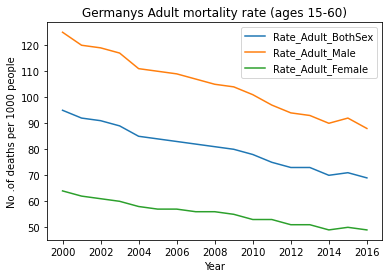

In [13]:
afghan = df.loc[(df['Country'] == 'Afghanistan')]
afghan.plot(x='Year', y=['Rate_Adult_BothSex','Rate_Adult_Male','Rate_Adult_Female'])
plt.ylabel('No .of deaths per 1000 people')
plt.title('Afghanistans Adult mortality rate (ages 15-60)')
plt.show()

germany = df.loc[(df['Country'] == 'Germany')]
germany.plot(x='Year', y=['Rate_Adult_BothSex','Rate_Adult_Male','Rate_Adult_Female'])
plt.ylabel('No .of deaths per 1000 people')
plt.title('Germanys Adult mortality rate (ages 15-60)')
plt.show()